## The idea is analyze the dataset and try to predict the price of the car using different regression models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(path, header=None)

In [4]:
df.describe()

,0,9,10,11,12,13,16,20,23,24
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
# Add headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
           "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
           "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Preprocessing

In [7]:
# replace the "?" symbol with NaN so we can dealing with missing values
df1=df.replace('?', np.NaN)

In [8]:
# The price is the feature to predict, so can we delete this values
df=df1.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [9]:
# Count the missing values
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    na_values = len(missing_data[missing_data[column] == True])
    if na_values > 0:
        print(column, 'has', na_values, 'NaN values')
        print("")

normalized-losses has 37 NaN values

num-of-doors has 2 NaN values

bore has 4 NaN values

stroke has 4 NaN values

horsepower has 2 NaN values

peak-rpm has 2 NaN values



In [10]:
# NaN values that we go to replace with the mean
columns = ["normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"]
for i in columns:
    avg = df[i].astype("float").mean(axis=0)
    df[i].replace(np.nan, avg, inplace=True)
    print('NaN values in the column', i, 'replaced by the mean:', avg)

NaN values in the column normalized-losses replaced by the mean: 122.0
NaN values in the column stroke replaced by the mean: 3.256903553299492
NaN values in the column bore replaced by the mean: 3.330710659898477
NaN values in the column horsepower replaced by the mean: 103.39698492462311
NaN values in the column peak-rpm replaced by the mean: 5117.587939698493


In [11]:
# NaN values in the Number of doors columns will be replaced with frequency (is categorical data)
most_value = df['num-of-doors'].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, most_value, inplace=True)
print('replaced')

replaced


In [12]:
# Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [13]:
df[["length", "width" ,"height"]]

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3
...,...,...,...
200,188.8,68.9,55.5
201,188.8,68.8,55.5
202,188.8,68.9,55.5
203,188.8,68.9,55.5


In [14]:
# Convert categorical values to indicator variable
categ_columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system', 'engine-type']
for i in categ_columns:
    dummy_variable = pd.get_dummies(df[i])
    for j in dummy_variable.columns:
        dummy_variable.rename(columns={j:i+'-'+''+j}, inplace=True)
    df = pd.concat([df, dummy_variable], axis=1)
    df.drop(i, axis = 1, inplace=True)
df

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,fuel-system-mfi,fuel-system-mpfi,fuel-system-spdi,fuel-system-spfi,engine-type-dohc,engine-type-l,engine-type-ohc,engine-type-ohcf,engine-type-ohcv,engine-type-rotor
0,3,122,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,1,0,0,1,0,0,0,0,0
1,3,122,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,1,0,0,1,0,0,0,0,0
2,1,122,two,94.5,171.2,65.5,52.4,2823,six,152,...,0,1,0,0,0,0,0,0,1,0
3,2,164,four,99.8,176.6,66.2,54.3,2337,four,109,...,0,1,0,0,0,0,1,0,0,0
4,2,164,four,99.4,176.6,66.4,54.3,2824,five,136,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,four,109.1,188.8,68.9,55.5,2952,four,141,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,four,109.1,188.8,68.8,55.5,3049,four,141,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,four,109.1,188.8,68.9,55.5,3012,six,173,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,four,109.1,188.8,68.9,55.5,3217,six,145,...,0,0,0,0,0,0,1,0,0,0


In [15]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [16]:
# Manual conversions of number of doors column
df['num-of-doors'].replace('two', 2, inplace=True)
df['num-of-doors'].replace('four', 4, inplace=True)

In [17]:
cylinders = df['num-of-cylinders'].unique()
cylinders

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [18]:
df['num-of-cylinders'].replace('two', 2, inplace=True)
df['num-of-cylinders'].replace('three', 3, inplace=True)
df['num-of-cylinders'].replace('four', 4, inplace=True)
df['num-of-cylinders'].replace('five', 5, inplace=True)
df['num-of-cylinders'].replace('six', 6, inplace=True)
df['num-of-cylinders'].replace('eight', 8, inplace=True)
df['num-of-cylinders'].replace('twelve', 12, inplace=True)

In [19]:
df.head(10)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,fuel-system-mfi,fuel-system-mpfi,fuel-system-spdi,fuel-system-spfi,engine-type-dohc,engine-type-l,engine-type-ohc,engine-type-ohcf,engine-type-ohcv,engine-type-rotor
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,1,0,0,1,0,0,0,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,1,0,0,1,0,0,0,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,0,1,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,1,0,0,0,0,1,0,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,1,0,0,0,0,1,0,0,0
5,2,122,2,99.8,177.3,66.3,53.1,2507,5,136,...,0,1,0,0,0,0,1,0,0,0
6,1,158,4,105.8,192.7,71.4,55.7,2844,5,136,...,0,1,0,0,0,0,1,0,0,0
7,1,122,4,105.8,192.7,71.4,55.7,2954,5,136,...,0,1,0,0,0,0,1,0,0,0
8,1,158,4,105.8,192.7,71.4,55.9,3086,5,131,...,0,1,0,0,0,0,1,0,0,0
10,2,192,2,101.2,176.8,64.8,54.3,2395,4,108,...,0,1,0,0,0,0,1,0,0,0


### Exploratory Data Analysis

In [20]:
# Find correlations
correlations = df.corr()['price'].to_frame()
correlations

,price
symboling,-0.082391
normalized-losses,0.133999
num-of-doors,0.042435
wheel-base,0.584642
length,0.690628
...,...
engine-type-l,0.045151
engine-type-ohc,-0.332851
engine-type-ohcf,0.019039
engine-type-ohcv,0.394454


In [21]:
# Get the best features that has greatest correlation
features_corr = correlations.index[(correlations['price'] > 0.7) | (correlations['price'] < -0.7)].tolist()
features_corr.remove('price')
features_corr

['width', 'curb-weight', 'num-of-cylinders', 'engine-size', 'highway-mpg']

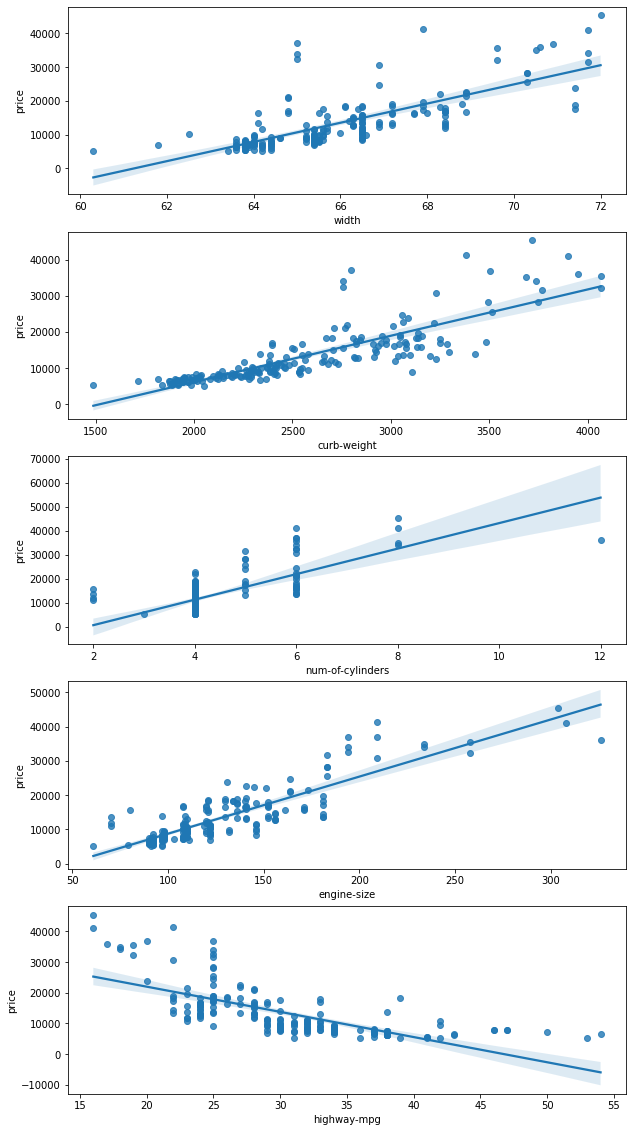

In [22]:
# Look the correlations
fig, axes = plt.subplots(len(features_corr), 1, figsize=(10,20))
for i in enumerate(features_corr):
    sns.regplot(x=i[1], y="price", data=df, ax=axes[i[0]])

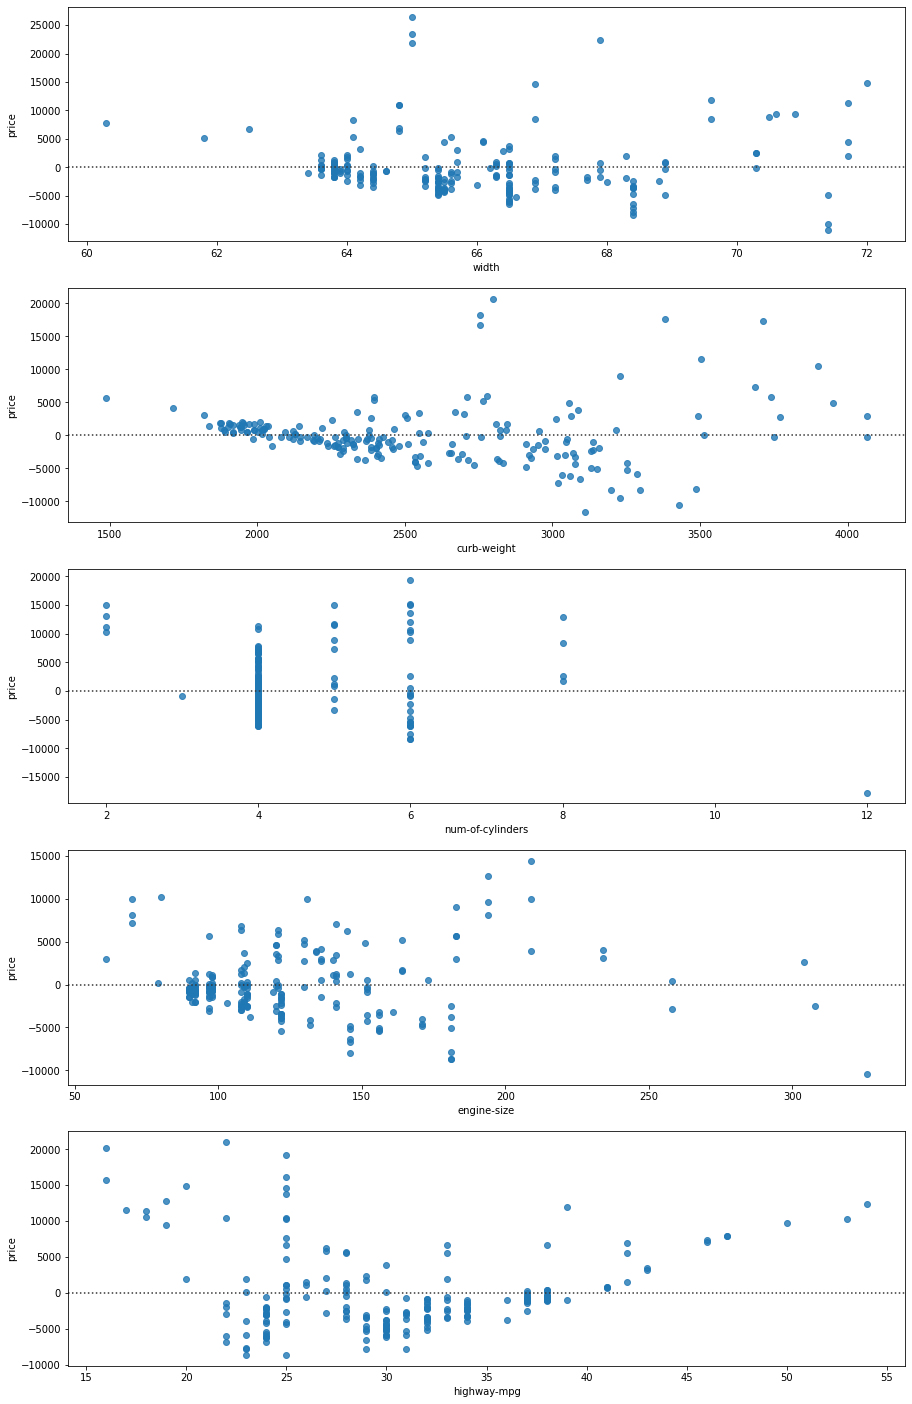

In [23]:
# Look the residuals
fig, axes = plt.subplots(len(features_corr), 1, figsize=(15,25))
for i in enumerate(features_corr):
    sns.residplot(x=i[1], y="price", data=df, ax=axes[i[0]])

In [24]:
# Ensure the correlation values by means of the P-value
for i in features_corr:
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    print("The Pearson Correlation Coefficient is", round(pearson_coef,3), "with a P-value of P =", p_value, 'for', i)

The Pearson Correlation Coefficient is 0.751 with a P-value of P = 9.2003355104806e-38 for width
The Pearson Correlation Coefficient is 0.834 with a P-value of P = 2.189577238894065e-53 for curb-weight
The Pearson Correlation Coefficient is 0.709 with a P-value of P = 5.731542187375043e-32 for num-of-cylinders
The Pearson Correlation Coefficient is 0.872 with a P-value of P = 9.265491622201286e-64 for engine-size
The Pearson Correlation Coefficient is -0.705 with a P-value of P = 1.7495471144476358e-31 for highway-mpg


### Model development and evaluation

In [25]:
lm = LinearRegression()

In [26]:
# We are going to try with a multiple linear regression with a cross_validation
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)

In [28]:
lm.fit(x_train, y_train)

LinearRegression()

In [29]:
# Model
print('The intercept will be', lm.intercept_)
for i, j in zip(lm.coef_, x):
    print('and the coefficients for', j, 'will be', i)

The intercept will be -14596.755929990093
and the coefficients for horsepower will be 55.06668411611955
and the coefficients for curb-weight will be 4.140195259845974
and the coefficients for engine-size will be 85.79125723772879
and the coefficients for highway-mpg will be 22.943012549823653


<b>Price</b> = -14596.75 + 55.066 x <b>horsepower</b> + 4.140 x <b>curb-weight</b> + 85.79 x <b>engine-size</b> + 22.94 x <b>highway-mpg</b>


In [30]:
scores_mean = []
for i in range(2,100):
    scores = cross_val_score(lm, x_train, y_train, cv=i)
    scores_mean.append(scores.mean())
print('The max R-square is:', round(max(scores_mean),3) * 100, 'percent')

The max R-square is: 81.10000000000001 percent


### let's try a Polynomial transformation to look the results using a Pipeline

In [31]:
Input= [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [32]:
pipe=Pipeline(Input)

In [33]:
x_train = x_train.astype(float)
pipe.fit(x_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
scores_mean = []
for i in range(2,100):
    scores = cross_val_score(pipe, x_train, y_train, cv=i)
    scores_mean.append(scores.mean())
print('The max R-square is:', round(max(scores_mean),3) * 100, 'percent')

The max R-square is: 82.19999999999999 percent


In [35]:
print('The polynomial model has', round(pipe.score(x, y) - lm.score(x, y), 3) * 100, 'more accuracy that multiple linear model')

The polynomial model has 3.6999999999999997 more accuracy that multiple linear model


### Supervise the model

In [36]:
yhat_test = pipe.predict(x_test)

Text(0, 0.5, 'Proportion of Cars')

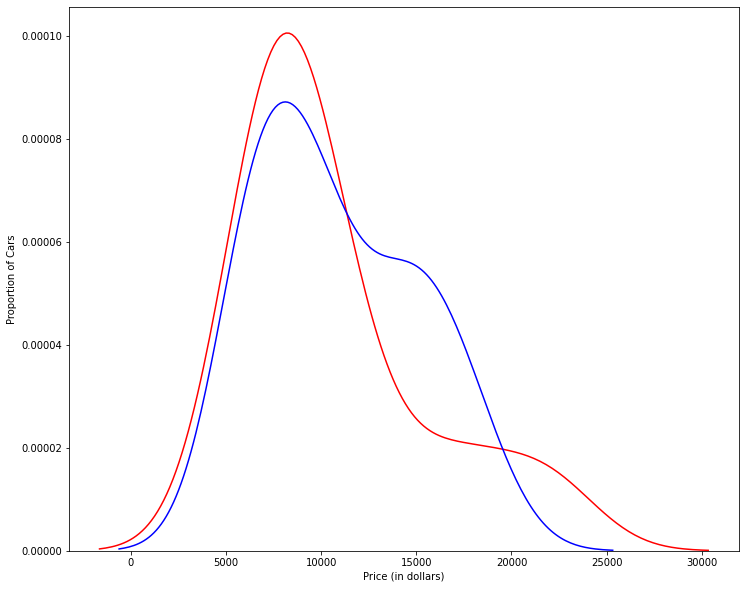

In [37]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label='Actual values')
ax2 = sns.distplot(yhat_test, hist=False, color="b", label='Prediction', ax=ax1)
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

### We will view how the parameter alpha change the model using ride regression and grid search

In [38]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
rige_model=Ridge()

In [39]:
grid_1 = GridSearchCV(rige_model, parameters1, cv=4)

In [40]:
grid_1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [41]:
best_estimator=grid_1.best_estimator_
print('The best estimator is with', best_estimator, 'with a score of', round(best_estimator.score(x_test, y_test),3) * 100, 'percent')

The best estimator is with Ridge(alpha=10000) with a score of 62.3 percent


In [42]:
yhat_test_2 = best_estimator.predict(x_test)

Text(0, 0.5, 'Proportion of Cars')

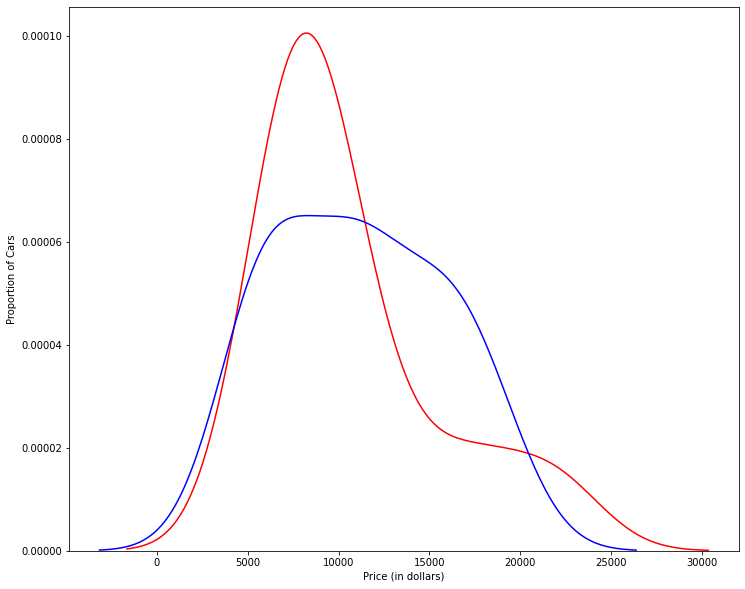

In [43]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label='Actual values')
ax2 = sns.distplot(yhat_test_2, hist=False, color="b", label='Prediction', ax=ax1)
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

### The best model still remains the Multiple linear with polynomial features and standard scaler